In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import statsmodels.api as sm # import statsmodels 
from sklearn import linear_model
from scipy import stats
import seaborn as sns
from scipy.stats import ttest_1samp

In [131]:
df = pd.read_csv('full.csv')
df = df[df['isMainSleep'] == 1]
df['week_start'] = pd.to_datetime(df['dataDate']).dt.to_period('W').apply(lambda r: r.start_time)

In [132]:
eff = df[['participID', 'dataDate', 'efficiency', 'week_start']]
eff


,participID,dataDate,efficiency,week_start
0,3LZGLG,2015-08-25,97,2015-08-24
1,3LZGLG,2015-08-26,96,2015-08-24
2,3LZGLG,2015-08-27,95,2015-08-24
3,3LZGLG,2015-08-28,97,2015-08-24
4,3LZGLG,2015-08-29,90,2015-08-24
...,...,...,...,...
39459,4GM577,2016-05-02,91,2016-05-02
39460,4GM577,2016-05-03,91,2016-05-02
39461,4GM577,2016-05-04,89,2016-05-02
39462,4GM577,2016-05-05,93,2016-05-02


In [133]:
eff = eff.groupby(['participID', 'week_start'], as_index=False).mean()
eff.head()

,participID,week_start,efficiency
0,3LZGLG,2015-08-24,95.500000
1,3LZGLG,2015-08-31,96.142857
2,3LZGLG,2015-09-07,97.142857
3,3LZGLG,2015-09-14,95.428571
4,3LZGLG,2015-09-21,96.714286


In [134]:
pivot = eff.pivot(index='participID', columns='week_start', values='efficiency')
pivot.head()

week_start,2015-08-24,2015-08-31,2015-09-07,2015-09-14,2015-09-21,2015-09-28,2015-10-05,2015-10-12,2015-10-19,2015-10-26,...,2016-02-29,2016-03-07,2016-03-14,2016-03-21,2016-03-28,2016-04-04,2016-04-11,2016-04-18,2016-04-25,2016-05-02
participID,,,,,,,,,,,,,,,,,,,,,
3LZGLG,95.50,96.142857,97.142857,95.428571,96.714286,95.714286,95.000000,95.428571,96.00,92.857143,...,97.285714,95.666667,94.000000,95.142857,92.571429,94.857143,95.428571,93.571429,92.714286,94.00
3LZJFK,94.20,95.142857,95.571429,92.600000,95.142857,93.714286,93.000000,94.000000,92.00,95.166667,...,96.000000,95.142857,94.833333,95.428571,94.571429,94.000000,96.000000,93.857143,93.333333,NaN
3LZRZQ,NaN,96.000000,94.000000,95.000000,93.285714,92.571429,93.571429,92.142857,94.25,92.142857,...,95.200000,94.000000,94.571429,96.333333,94.428571,95.333333,96.571429,94.857143,95.857143,94.40
3M29ZH,98.00,97.142857,98.400000,97.000000,97.666667,81.500000,97.750000,97.833333,97.60,95.500000,...,98.400000,98.750000,97.600000,97.000000,99.200000,98.500000,98.750000,98.142857,97.800000,97.75
3M2QNS,94.25,93.166667,94.500000,91.857143,92.600000,92.000000,91.600000,90.571429,86.50,90.833333,...,93.833333,92.800000,93.285714,94.428571,94.000000,92.500000,93.250000,94.142857,93.800000,93.50


In [135]:
pivot_drop = pivot.dropna()
#68 participants who had at least one night of data from all 37 weeks 

In [136]:
pdrop= pivot_drop[(np.abs(stats.zscore(pivot_drop)) < 3).all(axis=1)]

In [155]:
ww

['2015-08-24',
 '2015-08-31',
 '2015-09-07',
 '2015-09-14',
 '2015-09-21',
 '2015-09-28',
 '2015-10-05',
 '2015-10-12',
 '2015-10-19',
 '2015-10-26',
 '2015-11-02',
 '2015-11-09',
 '2015-11-16',
 '2015-11-23',
 '2015-11-30',
 '2015-12-07',
 '2015-12-14',
 '2015-12-21',
 '2015-12-28',
 '2016-01-04',
 '2016-01-11',
 '2016-01-18',
 '2016-01-25',
 '2016-02-01',
 '2016-02-08',
 '2016-02-15',
 '2016-02-22',
 '2016-02-29',
 '2016-03-07',
 '2016-03-14',
 '2016-03-21',
 '2016-03-28',
 '2016-04-04',
 '2016-04-11',
 '2016-04-18',
 '2016-04-25',
 '2016-05-02']

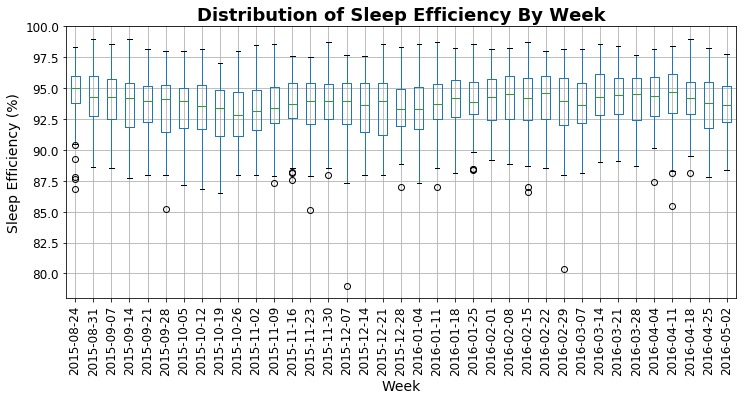

In [173]:
pdrop.boxplot(figsize=(12,5), fontsize=12);
plt.xticks(range(1, len(ww)+1),ww, fontsize=12);
plt.xticks(rotation=90);
plt.title('Distribution of Sleep Efficiency By Week', fontsize=18, fontweight='bold');
plt.ylabel('Sleep Efficiency (%)', fontsize=14);
plt.xlabel('Week', fontsize=14);
plt.savefig('Figure2', dpi=300, bbox_inches='tight')

In [138]:
def paired_t_test(before, after):
    ttest,pval = stats.ttest_rel(before, after)
    #print(pval)
    if pval<0.10:
        print("reject null hypothesis")
    #else:
    #    print("accept null hypothesis")

In [139]:
pd_flat = pdrop.reset_index()

In [140]:
weeks = pdrop.columns
l = len(weeks)
for index, obj in enumerate(weeks):
    if index < (l - 1):
        print(weeks[index+1])
        this_week = pd_flat[weeks[index]]
        next_week = pd_flat[weeks[index+1]]
        paired_t_test(this_week, next_week)

2015-08-31 00:00:00
2015-09-07 00:00:00
2015-09-14 00:00:00
2015-09-21 00:00:00
2015-09-28 00:00:00
2015-10-05 00:00:00
2015-10-12 00:00:00
2015-10-19 00:00:00
reject null hypothesis
2015-10-26 00:00:00
2015-11-02 00:00:00
2015-11-09 00:00:00
2015-11-16 00:00:00
2015-11-23 00:00:00
2015-11-30 00:00:00
2015-12-07 00:00:00
2015-12-14 00:00:00
2015-12-21 00:00:00
2015-12-28 00:00:00
2016-01-04 00:00:00
2016-01-11 00:00:00
2016-01-18 00:00:00
reject null hypothesis
2016-01-25 00:00:00
2016-02-01 00:00:00
2016-02-08 00:00:00
2016-02-15 00:00:00
2016-02-22 00:00:00
2016-02-29 00:00:00
2016-03-07 00:00:00
2016-03-14 00:00:00
reject null hypothesis
2016-03-21 00:00:00
2016-03-28 00:00:00
2016-04-04 00:00:00
2016-04-11 00:00:00
2016-04-18 00:00:00
2016-04-25 00:00:00
reject null hypothesis
2016-05-02 00:00:00


In [141]:
# checking normality: is paired t test the right thing to be doing?

In [142]:
def check_normal(before, after):
    diff = before - after
    diff.plot(kind='hist', title= 'Efficiency Difference')
    plt.show()

In [143]:
weeks = pdrop.columns
l = len(weeks)
for index, obj in enumerate(weeks):
    if index < (l - 1):
       # print(weeks[index+1])
        this_week = pd_flat[weeks[index]]
        next_week = pd_flat[weeks[index+1]]
       # check_normal(this_week, next_week)

## Wilcoxon Signed Rank Test
### No assumptions about normality

In [144]:
def wilcoxon_t_test(before, after, pvals):
    ttest,pval = stats.wilcoxon(before, after)
    #print(pval)
    if pval<0.05:
        print("reject null hypothesis")
    pvals.append(pval)
    #else:
    #    print("accept null hypothesis")stats.wilcoxon(df['bp_before'], df['bp_after'])

In [145]:
weeks = pdrop.columns
pvals = []
l = len(weeks)
for index, obj in enumerate(weeks):
    if index < (l - 1):
        print(weeks[index+1])
        this_week = pd_flat[weeks[index]]
        next_week = pd_flat[weeks[index+1]]
        wilcoxon_t_test(this_week, next_week, pvals)

2015-08-31 00:00:00
2015-09-07 00:00:00
2015-09-14 00:00:00
2015-09-21 00:00:00
2015-09-28 00:00:00
2015-10-05 00:00:00
2015-10-12 00:00:00
2015-10-19 00:00:00
2015-10-26 00:00:00
2015-11-02 00:00:00
2015-11-09 00:00:00
2015-11-16 00:00:00
2015-11-23 00:00:00
2015-11-30 00:00:00
2015-12-07 00:00:00
2015-12-14 00:00:00
2015-12-21 00:00:00
2015-12-28 00:00:00
2016-01-04 00:00:00
2016-01-11 00:00:00
2016-01-18 00:00:00
2016-01-25 00:00:00
2016-02-01 00:00:00
2016-02-08 00:00:00
2016-02-15 00:00:00
2016-02-22 00:00:00
2016-02-29 00:00:00
2016-03-07 00:00:00
2016-03-14 00:00:00
reject null hypothesis
2016-03-21 00:00:00
2016-03-28 00:00:00
2016-04-04 00:00:00
2016-04-11 00:00:00
2016-04-18 00:00:00
2016-04-25 00:00:00
reject null hypothesis
2016-05-02 00:00:00


In [146]:
w

Index(['2015-08-31', '2015-09-07', '2015-09-14', '2015-09-21', '2015-09-28',
       '2015-10-05', '2015-10-12', '2015-10-19', '2015-10-26', '2015-11-02',
       '2015-11-09', '2015-11-16', '2015-11-23', '2015-11-30', '2015-12-07',
       '2015-12-14', '2015-12-21', '2015-12-28', '2016-01-04', '2016-01-11',
       '2016-01-18', '2016-01-25', '2016-02-01', '2016-02-08', '2016-02-15',
       '2016-02-22', '2016-02-29', '2016-03-07', '2016-03-14', '2016-03-21',
       '2016-03-28', '2016-04-04', '2016-04-11', '2016-04-18', '2016-04-25',
       '2016-05-02'],
      dtype='object', name='week_start')

In [147]:
w2w = weeks[1:]

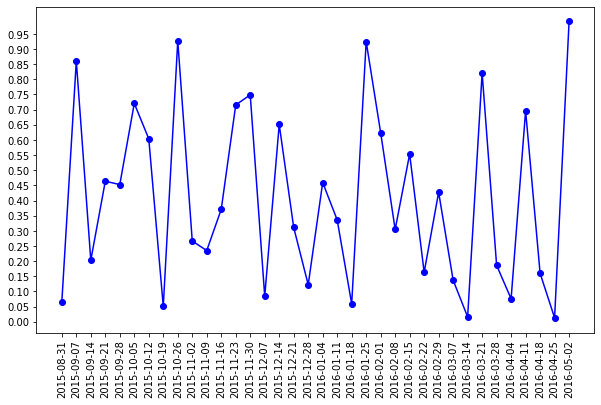

In [148]:
plt.figure(figsize=(10,6));
myplot = plt.plot(w2w, pvals, marker='o', color='blue')
plt.xticks(rotation=90);
plt.yticks(np.arange(0, 1, 0.05));
plt.xticks(w2w);
plt.show()

In [149]:
types = ['2nd Week Back'
         , 'Normal'
         , 'Normal'
         , 'Normal'
         , 'Normal'
         , 'Pre-Exams'
         , 'Exams'
         , 'Break'
         ,'Back from Break'
         , '2nd Week Back'
         , 'Normal'
         , 'Normal'
         , 'Break'
         , 'Back from Break'
         , 'Pre-Exams'
         , 'Exams'
         , 'Break'
         , 'Break'
         , 'Break'
         , 'Back from Break'
         , '2nd Week Back'
         , 'Normal'
         , 'Normal'
         , 'Normal'
         , 'Normal'
         , 'Pre-Exams'
         , 'Exams'
         , 'Break'
         , 'Back from Break'
         , '2nd Week Back'
         , 'Back from Break'
         , '2nd Week Back'
         , 'Normal'
         , 'Normal'
         , 'Pre-Exams'
         , 'Exams']


In [150]:
w = w2w.map(lambda x: str(x)[0:10])
w

Index(['2015-08-31', '2015-09-07', '2015-09-14', '2015-09-21', '2015-09-28',
       '2015-10-05', '2015-10-12', '2015-10-19', '2015-10-26', '2015-11-02',
       '2015-11-09', '2015-11-16', '2015-11-23', '2015-11-30', '2015-12-07',
       '2015-12-14', '2015-12-21', '2015-12-28', '2016-01-04', '2016-01-11',
       '2016-01-18', '2016-01-25', '2016-02-01', '2016-02-08', '2016-02-15',
       '2016-02-22', '2016-02-29', '2016-03-07', '2016-03-14', '2016-03-21',
       '2016-03-28', '2016-04-04', '2016-04-11', '2016-04-18', '2016-04-25',
       '2016-05-02'],
      dtype='object', name='week_start')

In [151]:
df_type = pd.DataFrame([w, types])
df_type

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,2015-08-31,2015-09-07,2015-09-14,2015-09-21,2015-09-28,2015-10-05,2015-10-12,2015-10-19,2015-10-26,2015-11-02,...,2016-02-29,2016-03-07,2016-03-14,2016-03-21,2016-03-28,2016-04-04,2016-04-11,2016-04-18,2016-04-25,2016-05-02
1,2nd Week Back,Normal,Normal,Normal,Normal,Pre-Exams,Exams,Break,Back from Break,2nd Week Back,...,Exams,Break,Back from Break,2nd Week Back,Back from Break,2nd Week Back,Normal,Normal,Pre-Exams,Exams


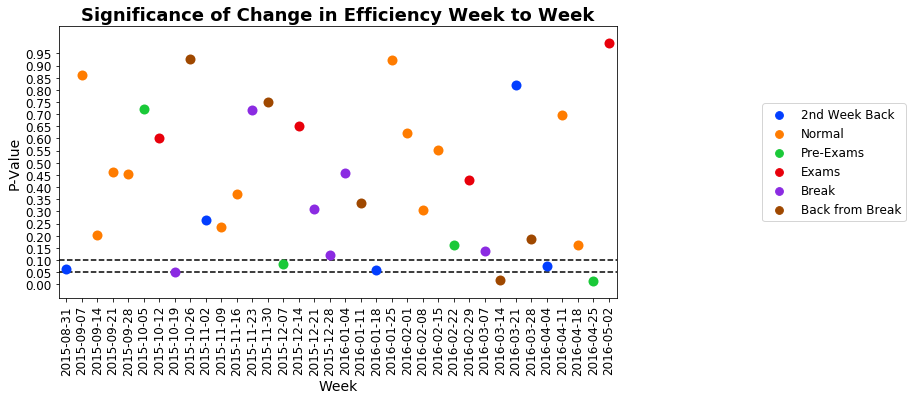

In [167]:
plt.figure(figsize=(10,5));
g = sns.swarmplot(x=w, y=pvals, hue=types, size = 10, palette= 'bright');
g.legend(loc='center left', fontsize=12, bbox_to_anchor=(1.25, 0.5), ncol=1);
plt.xticks(rotation=90, fontsize=12);
plt.yticks(np.arange(0, 1, 0.05), fontsize=12);
plt.axhline(y=.1, xmin=0, xmax=1, color='black', linestyle='--');
plt.axhline(y=.05, xmin=0, xmax=1, color='black', linestyle='--');
plt.xlabel('Week', fontsize=14);
plt.ylabel('P-Value', fontsize=14);
plt.title('Significance of Change in Efficiency Week to Week', fontsize=18, fontweight='bold');
plt.savefig('Figure3', dpi=300, bbox_inches="tight")

## Compare to "population" average

In [24]:
pd_flat.mean()

week_start
2015-08-24    94.522487
2015-08-31    94.174452
2015-09-07    94.123469
2015-09-14    93.827022
2015-09-21    93.632842
2015-09-28    93.377438
2015-10-05    93.519501
2015-10-12    93.418519
2015-10-19    92.943689
2015-10-26    93.025472
2015-11-02    93.311527
2015-11-09    93.501361
2015-11-16    93.608806
2015-11-23    93.515646
2015-11-30    93.714550
2015-12-07    93.336584
2015-12-14    93.338209
2015-12-21    93.549828
2015-12-28    93.208503
2016-01-04    93.361679
2016-01-11    93.688209
2016-01-18    94.035450
2016-01-25    94.037226
2016-02-01    94.031255
2016-02-08    94.225359
2016-02-15    94.034618
2016-02-22    94.232993
2016-02-29    93.822298
2016-03-07    93.675094
2016-03-14    94.241081
2016-03-21    94.241912
2016-03-28    94.048148
2016-04-04    94.301247
2016-04-11    94.325964
2016-04-18    94.093613
2016-04-25    93.595465
2016-05-02    93.572222
dtype: float64

In [47]:
def compareMean(weekData, pvals):
    tset, pval = ttest_1samp(weekData, pd_flat.mean().mean())
    pvals.append(pval)
    print(pval)
    if pval < 0.10:    # alpha value is 0.05 or 5%
        print(" we are rejecting null hypothesis")
    #else:
        #print("we are accepting null hypothesis")

In [48]:
weeks = pdrop.columns
pvals = []
for w in weeks:
    print(w)
    this_week = pd_flat[w]
    compareMean(this_week, pvals)

2015-08-24 00:00:00
0.02232684063269656
 we are rejecting null hypothesis
2015-08-31 00:00:00
0.17123314549550034
2015-09-07 00:00:00
0.24388441451711854
2015-09-14 00:00:00
0.8285989514391889
2015-09-21 00:00:00
0.673603331434145
2015-09-28 00:00:00
0.2298971848318779
2015-10-05 00:00:00
0.40690473343564715
2015-10-12 00:00:00
0.2509424430534074
2015-10-19 00:00:00
0.009261694497891954
 we are rejecting null hypothesis
2015-10-26 00:00:00
0.011656862181907961
 we are rejecting null hypothesis
2015-11-02 00:00:00
0.12337855570861628
2015-11-09 00:00:00
0.3824991903215713
2015-11-16 00:00:00
0.6051238521102844
2015-11-23 00:00:00
0.4443942355016315
2015-11-30 00:00:00
0.8780618642472773
2015-12-07 00:00:00
0.29716975417116626
2015-12-14 00:00:00
0.169026033259107
2015-12-21 00:00:00
0.5080057461716453
2015-12-28 00:00:00
0.059326021762311984
 we are rejecting null hypothesis
2016-01-04 00:00:00
0.1844439372616004
2016-01-11 00:00:00
0.8012519882573055
2016-01-18 00:00:00
0.3436912414449

In [57]:
types1 = ['2nd Week Back'
         , 'Normal'
         , 'Normal'
         , 'Normal'
         , 'Normal'
         , 'Pre-Exams'
         , 'Exams'
         , 'Break'
         ,'Back from Break'
         , '2nd Week Back'
         , 'Normal'
         , 'Normal'
         , 'Break'
         , 'Back from Break'
         , 'Pre-Exams'
         , 'Exams'
         , 'Break'
         , 'Break'
         , 'Break'
         , 'Back from Break'
         , '2nd Week Back'
         , 'Normal'
         , 'Normal'
         , 'Normal'
         , 'Normal'
         , 'Pre-Exams'
         , 'Exams'
         , 'Break'
         , 'Back from Break'
         , '2nd Week Back'
         , 'Back from Break'
         , '2nd Week Back'
         , 'Normal'
         , 'Normal'
         , 'Pre-Exams'
         , 'Exams']

In [122]:
len(types1)

36

In [120]:
ww = [str(x)[0:10] for x in weeks];

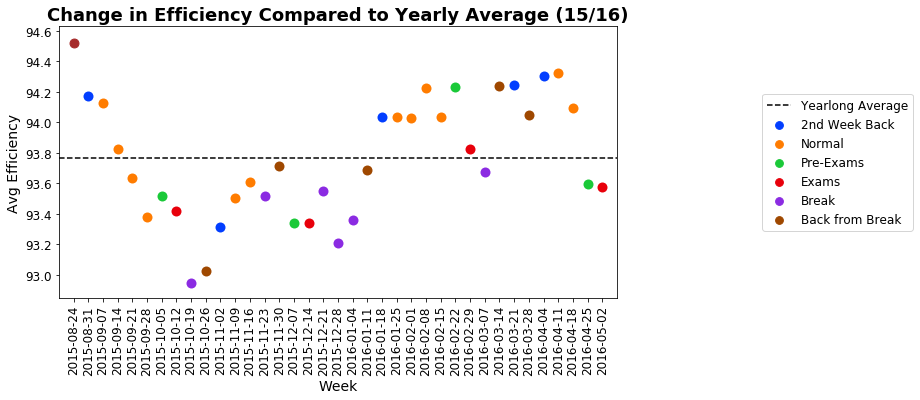

In [181]:
plt.figure(figsize=(10,5));
g = sns.swarmplot(x=np.arange(1, 37), y=pd_flat.mean()[1:], hue=types1, size = 10, palette= 'bright');

plt.xlim(-2, 36);
plt.scatter(-1, pd_flat.mean()[0], marker='o', s=80, color='brown');
plt.xticks(range(-1, len(ww)-1),ww, fontsize=12);
plt.xticks(rotation=90);
plt.yticks(fontsize=12);
#plt.yticks(np.arange(0, 1, 0.05));
plt.axhline(y= pd_flat.mean().mean(), xmin=0, xmax=1, color='black', linestyle='--', label='Yearlong Average');
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1, fontsize=12);
plt.xlabel('Week', fontsize=14);
plt.ylabel('Avg Efficiency', fontsize=14);
plt.title('Change in Efficiency Compared to Yearly Average (15/16)', fontsize=18, fontweight='bold');
plt.savefig('Figure4', dpi=300, bbox_inches="tight")
plt.savefig('Figure5a', dpi=300, bbox_inches="tight")